<a href="https://colab.research.google.com/github/silvi3110/sis-252-inteligencia-artificial/blob/main/OpenCV9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Leer imagen
imagen = cv2.imread('imagenes.jpg')
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
_, binaria = cv2.threshold(gris, 127, 255, cv2.THRESH_BINARY)

In [3]:
# Encontrar contornos
contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [4]:
# Dibujar contornos y mostrar propiedades
for contorno in contornos:
    # Calcular perímetro
    perimetro = cv2.arcLength(contorno, True)

    # Calcular área
    area = cv2.contourArea(contorno)

    # Dibujar contorno
    cv2.drawContours(imagen, [contorno], -1, (0, 255, 0), 2)

    # Calcular centroide
    M = cv2.moments(contorno)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.circle(imagen, (cx, cy), 5, (255, 0, 0), -1)
        cv2.putText(imagen, f"A:{int(area)} P:{int(perimetro)}", (cx-50, cy-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

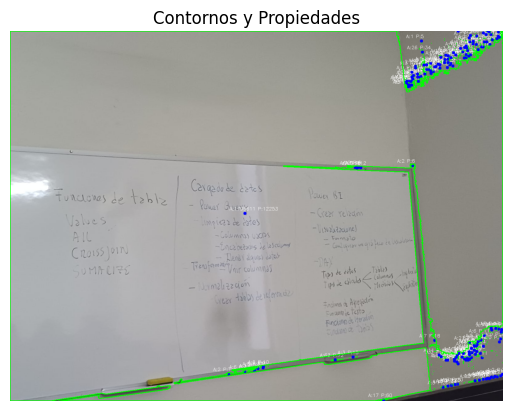

In [5]:
# Mostrar resultado
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Contornos y Propiedades')
plt.axis('off')
plt.show()